# *Automated Seismic Phase Recognition Using Neural Networks*
##### Syed Ali Raza Rizvi

In [1]:
# Downloading the file using the wget tool
# The file is quite large at 21 Gb, so a hosted runtime is probably better than a local one.
# If you are using Google Colaboratory, try and connect to a TPU (Tensor-Processing-Unit) Runtime, since it will have the necessary RAM and storage requirements.
!wget "https://service.scedc.caltech.edu/ftp/ross_etal_2018_bssa/scsn_ps_2000_2017_shuf.hdf5" 

--2020-02-21 00:51:15--  https://service.scedc.caltech.edu/ftp/ross_etal_2018_bssa/scsn_ps_2000_2017_shuf.hdf5
Resolving service.scedc.caltech.edu (service.scedc.caltech.edu)... 131.215.68.169, 131.215.68.210
Connecting to service.scedc.caltech.edu (service.scedc.caltech.edu)|131.215.68.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22918775894 (21G)
Saving to: ‘scsn_ps_2000_2017_shuf.hdf5’

scsn_ps_2000_2017_s 100%[===================>]  21.34G  18.5MB/s    in 27m 42s 

2020-02-21 01:18:57 (13.2 MB/s) - ‘scsn_ps_2000_2017_shuf.hdf5’ saved [22918775894/22918775894]



In [2]:
# Importing the necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib as mpt
import matplotlib.pyplot as plt
import keras
import h5py

Using TensorFlow backend.


In [0]:
# Defining the data with the name 'dataset'
dataset = h5py.File("/content/scsn_ps_2000_2017_shuf.hdf5", 'r')

In [4]:
# X_signal is the dataset with the data streams
# X_signal contains 4773750 seismic waveforms, with each waveform having 3 (X, Y, Z axis) and being a list 400 floats long (due to 100 hz for 4 seconds)
X_signal=dataset['X']
# Y_classification contains the label for the corresponding X_test value: 0 = Seismic Noise, 1 = P wave, 2 = S wave
Y_classification=dataset['Y']
print(X_signal)
print(Y_classification)

<HDF5 dataset "X": shape (4773750, 400, 3), type "<f4">
<HDF5 dataset "Y": shape (4773750,), type "|u1">


In [5]:
print(X_signal[0])
print(Y_classification[0])

[[ 0.00253175  0.03051877 -0.00199683]
 [-0.01910741 -0.03796277  0.01287618]
 [ 0.01204591 -0.08188384  0.03215627]
 ...
 [ 0.11494433  0.12963136  0.32619262]
 [ 0.03553984  0.19334333  0.4559397 ]
 [ 0.03717369 -0.00864957  0.3731406 ]]
0


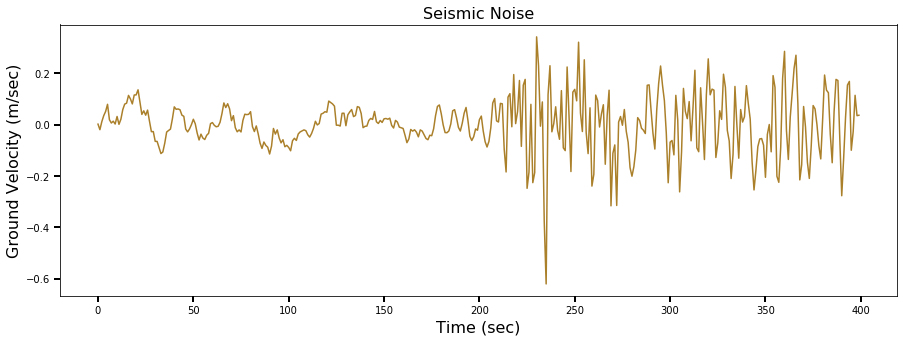

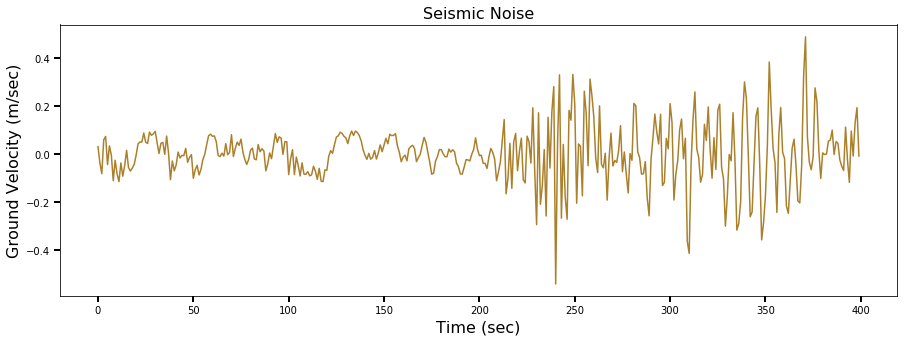

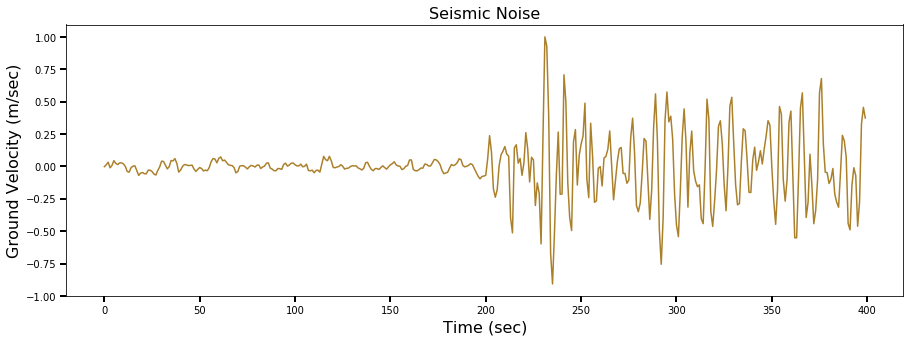

In [6]:
# Printing example X, Y, and Z axis seismograms for seismic noise

stream_1=[]
stream_2=[]
stream_3=[]

for i in X_signal[0]:
  stream_1.append(i[0])
  stream_2.append(i[1])
  stream_3.append(i[2])
unified=[stream_1, stream_2, stream_3]

font = {'family': "DejaVu Sans",
        'color':  'black',
        'weight': 'normal',
        'size': 16
        }


for i in unified:
  X = np.arange(len(i)) 
  plt.figure(figsize=(15,5))
  plt.plot(X, i, color='#ab802b')
  plt.xlabel('Time (sec)', fontdict=font)
  plt.ylabel('Ground Velocity (m/sec)',  fontdict=font)
  plt.title('Seismic Noise',  fontdict=font)
  plt.gca().tick_params(axis='both', direction='out', length=6, width=2, colors='black',
               grid_color='r', grid_alpha=0.5)
  plt.show()


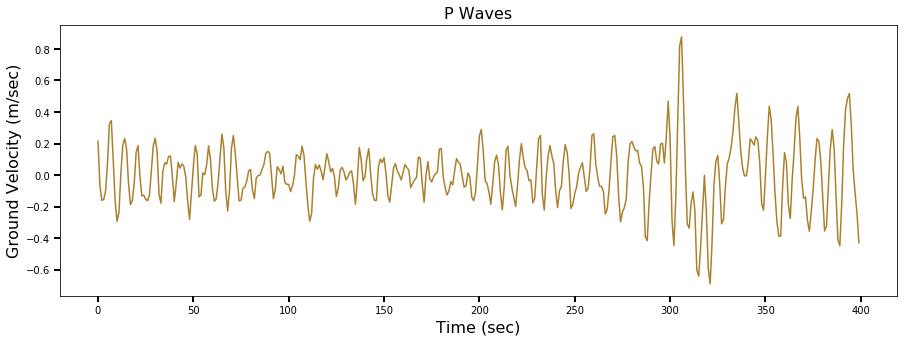

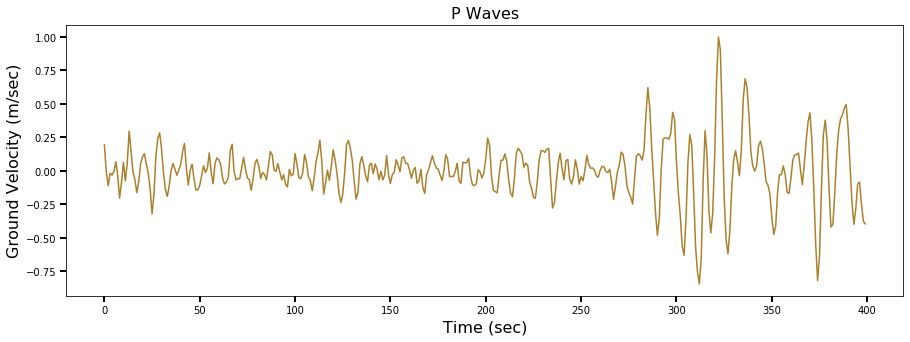

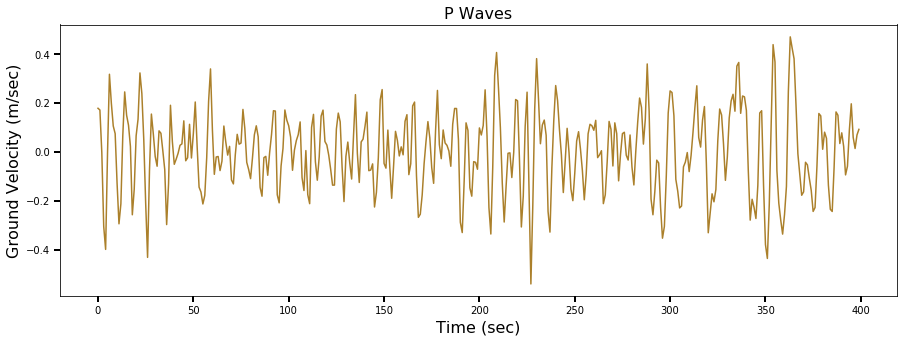

In [7]:
# Printing example X, Y, and Z axis seismograms for a P wave

stream_1=[]
stream_2=[]
stream_3=[]

for i in X_signal[1]:
  stream_1.append(i[0])
  stream_2.append(i[1])
  stream_3.append(i[2])
unified=[stream_1, stream_2, stream_3]

font = {'family': "DejaVu Sans",
        'color':  'black',
        'weight': 'normal',
        'size': 16
        }


for i in unified:
  X = np.arange(len(i)) 
  plt.figure(figsize=(15,5))
  plt.plot(X, i, color='#ab802b')
  plt.xlabel('Time (sec)', fontdict=font)
  plt.ylabel('Ground Velocity (m/sec)',  fontdict=font)
  plt.title('P Waves',  fontdict=font)
  plt.gca().tick_params(axis='both', direction='out', length=6, width=2, colors='black',
               grid_color='r', grid_alpha=0.5)
  plt.show()

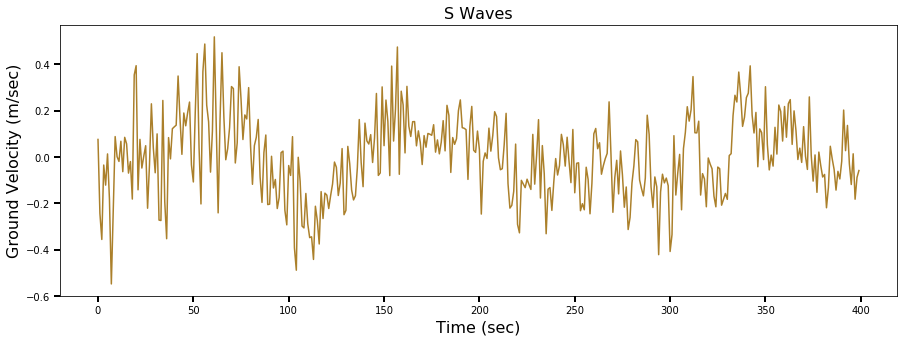

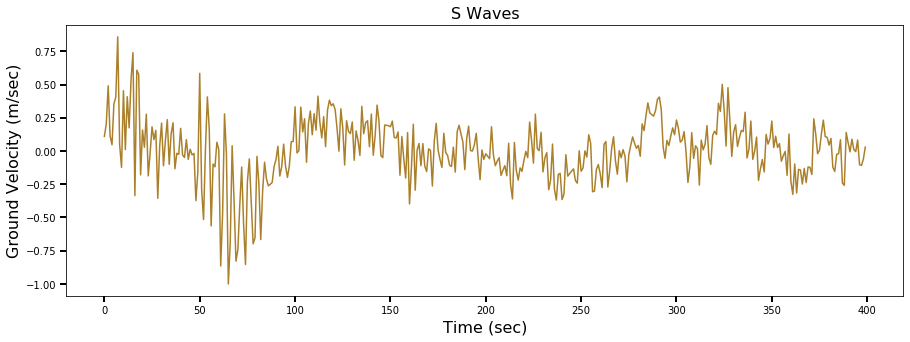

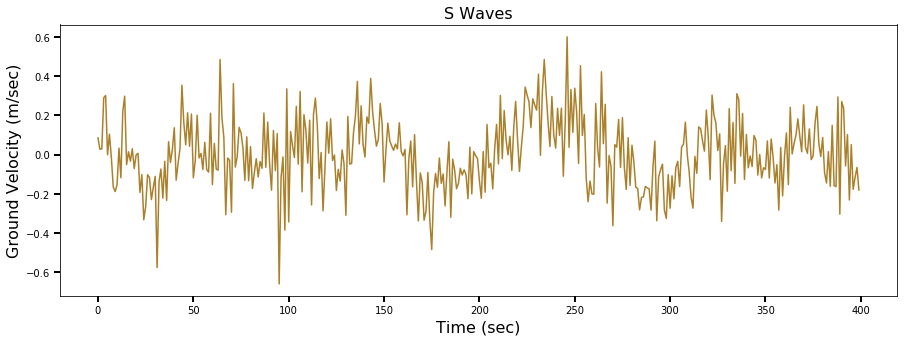

In [8]:
# Printing example X, Y, and Z axis seismograms for an S Wave

stream_1=[]
stream_2=[]
stream_3=[]

for i in X_signal[2]:
  stream_1.append(i[0])
  stream_2.append(i[1])
  stream_3.append(i[2])
unified=[stream_1, stream_2, stream_3]

font = {'family': "DejaVu Sans",
        'color':  'black',
        'weight': 'normal',
        'size': 16
        }


for i in unified:
  X = np.arange(len(i)) 
  plt.figure(figsize=(15,5))
  plt.plot(X, i, color='#ab802b')
  plt.xlabel('Time (sec)', fontdict=font)
  plt.ylabel('Ground Velocity (m/sec)',  fontdict=font)
  plt.title('S Waves',  fontdict=font)
  plt.gca().tick_params(axis='both', direction='out', length=6, width=2, colors='black',
               grid_color='r', grid_alpha=0.5)
  plt.show()

In [0]:
# Extracting the first 10% of the data due to RAM usage restrictions in Colab and re-arranging it in a numpy array
# Also splitting data into training and testing data with a 80:20 split

extracted_data=int((0.1*len(X_signal)))

X_train=[]
for i in X_signal[0:int(0.8*extracted_data)]:
    trace_1=[]
    trace_2=[]
    trace_3=[]
    for g in i:
        trace_1.append(g[0])
        trace_2.append(g[1])
        trace_3.append(g[2])
    X_train.append([trace_1, trace_2, trace_3])

X_test=[]
for i in X_signal[int(0.8*extracted_data):extracted_data]:
    trace_1=[]
    trace_2=[]
    trace_3=[]
    for g in i:
        trace_1.append(g[0])
        trace_2.append(g[1])
        trace_3.append(g[2])
    X_test.append([trace_1, trace_2, trace_3])

Y_train = Y_classification[0:int(0.8*extracted_data)]
Y_test = Y_classification[int(0.8*extracted_data):extracted_data]

In [0]:
# Flipping the rows and columns of the dataset to make it easier for the machine learning model to interpret
# Changing the nested lists to a numpy arrray 

X_train_final=[]
X_test_final=[]

for i in X_train:
    X_train_final.append(np.array(i))

for i in X_test:
    X_test_final.append(np.array(i))


X_train_final=np.array(X_train_final)
X_test_final=np.array(X_test_final)

In [0]:
# One hot encoding the labels for the sequence classifier
from keras.utils import to_categorical

Y_train=to_categorical(Y_train)
Y_test=to_categorical(Y_test)

In [20]:
# Create a model using the Keras Sequential API

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv1D
from keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential()
model.add(Conv1D(200, 2, activation='relu'))
model.add(Conv1D(130, 2, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(200, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(150, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
classifier=model.fit(
    X_train_final, Y_train, batch_size=100, epochs=50, validation_data=(X_test_final, Y_test), 
    callbacks=[EarlyStopping(monitor='val_loss', patience=3), ModelCheckpoint(filepath='Best_Model.hdf5', save_best_only=True)]
    )
print(model.summary())

Train on 381900 samples, validate on 95475 samples
Epoch 1/50
381900/381900 [==============================] - 82s 215us/step - loss: 0.3259 - acc: 0.8816 - val_loss: 0.2138 - val_acc: 0.9299
Epoch 2/50
381900/381900 [==============================] - 78s 204us/step - loss: 0.1832 - acc: 0.9401 - val_loss: 0.1905 - val_acc: 0.9403
Epoch 3/50
381900/381900 [==============================] - 80s 209us/step - loss: 0.1459 - acc: 0.9535 - val_loss: 0.1756 - val_acc: 0.9414
Epoch 4/50
381900/381900 [==============================] - 83s 216us/step - loss: 0.1229 - acc: 0.9612 - val_loss: 0.1811 - val_acc: 0.9446
Epoch 5/50
381900/381900 [==============================] - 80s 209us/step - loss: 0.1059 - acc: 0.9668 - val_loss: 0.1890 - val_acc: 0.9446
Epoch 6/50
381900/381900 [==============================] - 77s 203us/step - loss: 0.0926 - acc: 0.9712 - val_loss: 0.1745 - val_acc: 0.9442
Epoch 7/50
381900/381900 [==============================] - 79s 207us/step - loss: 0.0830 - acc: 0.9745

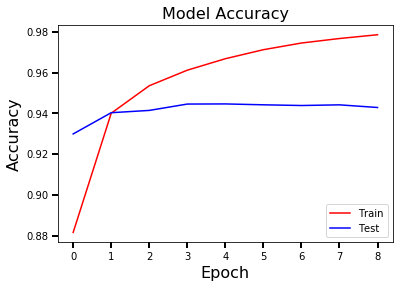

In [23]:
# Generating an Accuracy vs Epoch graph

font = {'family': "DejaVu Sans",
        'color':  'black',
        'weight': 'normal',
        'size': 16
        }

plt.plot(classifier.history['acc'], color='red')
plt.plot(classifier.history['val_acc'], color= 'blue')
plt.xlabel('Epoch', fontdict=font)
plt.ylabel('Accuracy', fontdict=font)
plt.title('Model Accuracy', fontdict=font)
plt.legend(['Train', 'Test'], loc='lower right')
plt.gca().tick_params(axis='both', direction='out', length=6, width=2, colors='black', grid_alpha=0.5)
plt.show()

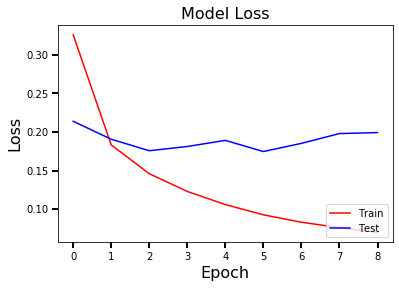

In [24]:
# Generating a Loss vs Epoch graph

font = {'family': "DejaVu Sans",
        'color':  'black',
        'weight': 'normal',
        'size': 16
        }

plt.plot(classifier.history['loss'], color='red')
plt.plot(classifier.history['val_loss'], color='blue')
plt.xlabel('Epoch', fontdict=font)
plt.ylabel('Loss', fontdict=font)
plt.title('Model Loss', fontdict=font)
plt.legend(['Train', 'Test'], loc='lower right')
plt.gca().tick_params(axis='both', direction='out', length=6, width=2, colors='black', grid_alpha=0.5)
plt.show()